# Reading Data and Importing dependencies

### Data from Stanford open police project. We use data from Rhode island. 
### https://openpolicing.stanford.edu/

In [90]:
#Importing the data


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


ri = pd.read_csv('police.csv')

## Exploring the data

In [91]:
# Lets have a peak at the dataframe 
# Each row of this data represent a traffic violation.
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [92]:
# Rows and columns available to us
ri.shape

(91741, 15)

In [93]:
# Data types for all our columns
#  Object represent strings and bool represents boolean
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

### Missing values 

In [94]:
# Checking Missing values 
# isnull() returns a dataframe with True where a value is Missing.
# We sum() it accross each column to find total values missing in each column.
# Since True is 1 and False 0, we can add boolean values

ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [95]:
def missing_percentage(df):
    
    """
    returns a new dataframe showing the percentage of missing values
    for each column in the original data provided
   
    """
    
    
    total = df.isnull().sum().sort_values(ascending = False)

    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    return missing_data



#Exploring percentage of missing values 

missing_df = missing_percentage(ri)
missing_df.head(10)

,Total,Percent
county_name,91741,100.000000
search_type,88545,96.516280
driver_age,5621,6.127032
driver_gender,5335,5.815284
stop_duration,5333,5.813104
is_arrested,5333,5.813104
stop_outcome,5333,5.813104
violation,5333,5.813104
violation_raw,5333,5.813104
driver_race,5333,5.813104


In [96]:
# Removing columns with all missing values
# we use the dropna() method. Specifying:
# 1. axis to use. 1 for column and 0 for rows.
# 2. condition to check. how = 'all' states if all values missing: drop. 
# 3. inplace = True makes it change the original dataframe

ri.dropna(axis = 1, how = 'all', inplace=True)

In [97]:
#one less column now
ri.shape

(91741, 14)

## Do men or women speed more often?

M    62895
F    23511
Name: driver_gender, dtype: int64
M    0.727901
F    0.272099
Name: driver_gender, dtype: float64


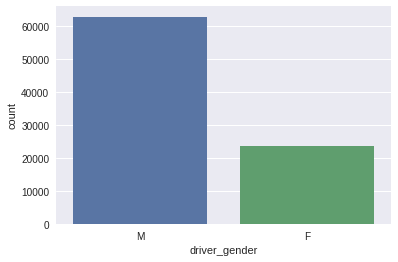

In [98]:
# We have a gender column in our dataset. Lets check the count of males and females.

print(ri['driver_gender'].value_counts())

print("="*25)

print(ri['driver_gender'].value_counts(normalize=True))


#There are 72% male driver in our dataset compared to 27% females.
#Lets see how they appear on a count plot.

print("="*25)

sns.countplot(ri['driver_gender'])

In [99]:
#Now lets figure out if men or women are caught more overspeeding.

print(ri[ri['violation'] == 'Speeding']['driver_gender'].value_counts())

# Looks like its the men who are caught overspeeding the most. 
# This can still be ambigous since our data has more men than women. 
# Lets see the distribution of how many men are caught overspeeding

print('='*30)

speeding_men = ri[(ri['violation']=='Speeding')]['driver_gender'].value_counts()['M']
total_men = ri['driver_gender'].value_counts()['M']


print('Percentage of overspeeding men out of all men: {}'.format(speeding_men/total_men))


#lets do the same for women 

speeding_women = ri[(ri['violation']=='Speeding')]['driver_gender'].value_counts()['F']
total_women = ri['driver_gender'].value_counts()['F']

print('Percentage of overspeeding women out of all women: {}'.format(speeding_women/total_women))


# There are a number of ways to interpret it. 
# Of all men who are caught, 52% are caught overspeeding.
# Of all women who are caught, 65% are caught overspeeding.



M    32979
F    15482
Name: driver_gender, dtype: int64
Percentage of overspeeding men out of all men: 0.5243501073217267
Percentage of overspeeding women out of all women: 0.6585002764663349


In [100]:
# We can shorten the code above to use a group by. 

ri.groupby('driver_gender')['violation'].value_counts(normalize=True).loc[:, 'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

## Does gender affect who gets searched during a stop?

### Columns to use: driver_gender and search_conducted

In [101]:
# Lets check out search conducted: 
# It is a boolean variable.

print(ri[['driver_gender', 'search_conducted']].head())


print("=" * 25)


#distribution of search conducted
print("Out of all 100 people stopped, 3 and a half of them were searched.")
print(ri['search_conducted'].value_counts(normalize = True))

print("=" * 25)

#Another trick to get the percentage of people searched is mean.
#Mean of boolean value will give the percentage of 1's appeared.

print(" % of people searched out of 100 : {:2f}%".format(ri['search_conducted'].mean() * 100))


  driver_gender  search_conducted
0             M             False
1             M             False
2             M             False
3             M             False
4             F             False
Out of all 100 people stopped, 3 and a half of them were searched.
False    0.965163
True     0.034837
Name: search_conducted, dtype: float64
 % of people searched out of 100 : 3.483720%


In [102]:
# Lets get some numbers. 

print(ri[ri['search_conducted'] == True]['driver_gender'].value_counts(normalize = True))

# Of all the searches conducted, 85% of those drivers were male.
# This is a similar question to the previous one and has multiple answers.

#Lets check the other side too.

print('='*30)

print(ri.groupby('driver_gender')['search_conducted'].mean())

# Females are searched at a 2% rate whereas males are searched twice the rate 


M    0.852628
F    0.147372
Name: driver_gender, dtype: float64
driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64


In [103]:
# Another interesting aspect to answer the question. 
# Not every violation leads to a search. They wont search a guy if he is caught without a seatbelt.

ri.groupby(['violation', 'driver_gender'])['search_conducted'].mean()

#the violations that gets searched the most is Registraion/plates followed by Equipment.

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

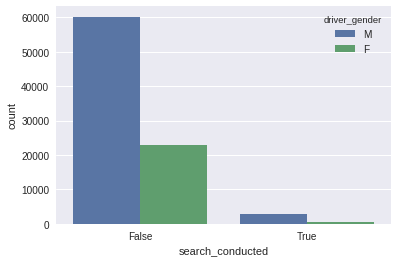

In [104]:

# driver gender and search conducted appear together.
sns.countplot(ri['search_conducted'], hue = ri['driver_gender'])


# Umm, looking at the True part, we can conclude that Males get searched more compared to women.


### Conclusion

There is some relation between getting searched and driver gender. You do get searched more if you are a male. 
But getting searched is also related to what type of violations occur. 

## Why is search_type missing so often? 

#### A very simple answer: Search was not conducted for 96.516% of the total violations hence no values recorded.

In [105]:
# How many missing values for search_type? - 88545

print("{:.3f}% values missing for search_type".format((ri['search_type'].isnull().sum()/ri.shape[0])*100))
print("{:.3f}% times search was not conducted".format((ri['search_conducted'].value_counts(normalize = True)[0])*100))

96.516% values missing for search_type
96.516% times search was not conducted


## During a search, how often is a driver frisked? 

##### A frisk would indicate searching the outer clothing of a person.

In [106]:
# Lets explore the type of searches that are carried out during a search.

ri[ri['search_conducted'] == True]['search_type'].value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Fris

In [107]:
# Search types are at times a combination of various types like Incident to arrest combined with a frisk.

#One way would be to count each time a person is frisked. Regardless of what other combination of search

ri['search_type'].str.contains('Frisk').value_counts(normalize = True)

# roughly 8.5% of the people who were searched, were frisked. 


False    0.914268
True     0.085732
Name: search_type, dtype: float64

### Which year had the least number of traffic stop?

In [108]:
# Lets create a new feature year
year=[i[:4] for i in ri['stop_date']]
    
ri['year'] = year 
ri['year'].value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: year, dtype: int64

In [109]:
# Another way to do the same: 

ri['stop_date'].str.slice(0,4).value_counts()


# It looks like the year 2005 had the least amount of traffic violations. 
# I wonder why this happend. Maybe we might stumble upon the answer while exploring the data further.

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

### How does drug activity change by time of day?

#### Using columns : drugs_related _stops

In [110]:
#Drugs related stops is a boolean indicating if the violation was related to drugs.

ri['drugs_related_stop'].head()

0    False
1    False
2    False
3    False
4    False
Name: drugs_related_stop, dtype: bool

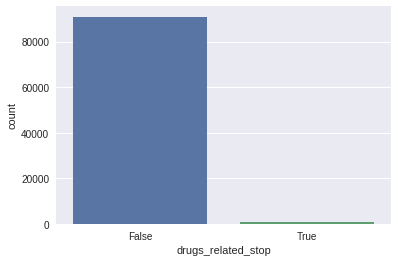

In [111]:
#We have only a very few drugs related stop.

sns.countplot(ri['drugs_related_stop'])

In [112]:
# Made a new column indicating the hour of day the violation occured. 
# Note: hour of day is 24hr format.

ri['time_of_day'] = ri['stop_time'].str.slice(0,2).astype(int)
print(ri['time_of_day'].head())

0     1
1     8
2    23
3    17
4    10
Name: time_of_day, dtype: int64


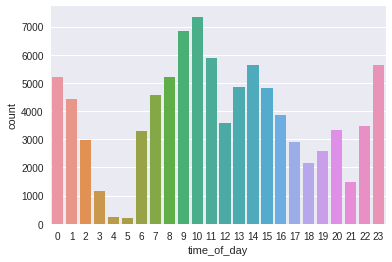

In [113]:
#Distribution of time of day..
#Looks like the number of stops go up from 7 to 11 (people commuting to there offices)
#the two tail peaks indicate 11am and midnight. 

sns.countplot(ri['time_of_day'])

day      0.857566
night    0.142434
Name: day_or_night, dtype: float64


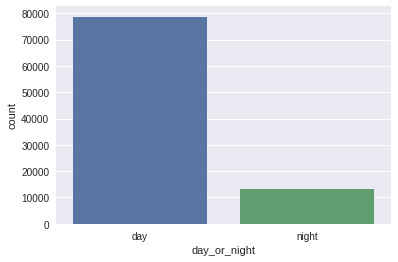

In [114]:
# At what time do most stops occur?
# Creating a new feature of Day or Night.
# Note : i took night from 6pm to midnight.

day_night = []

for i in ri['time_of_day']:
    if i in range(18, 23) or 0:
        day_night.append('night')
    else:
        day_night.append('day')

ri['day_or_night'] = day_night


#Most stops occur during the day.

print(ri['day_or_night'].value_counts(normalize = True))
sns.countplot(ri['day_or_night'])


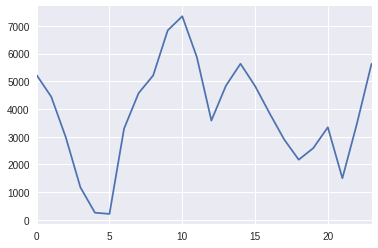

In [115]:
# Another plot for when do most stops occur? 
# Yep. Day time attracts the most stops.

ri['time_of_day'].value_counts().sort_index().plot()


##### Lets explore Drug related stops and its relation with time of day.

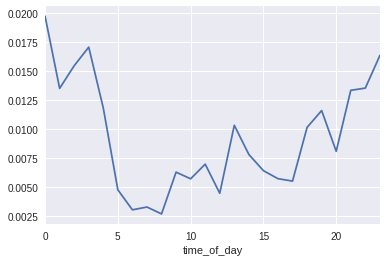

In [116]:
# Plotting time of day with Mean drugs related stop. 
# Interesting. 
# Mean Drugs related stops occur mostly during the night time.
# Mean Drugs related stops go up at around 10pm and reach peak at midnight. They go back down at start of day.


ri.groupby('time_of_day')['drugs_related_stop'].mean().plot()

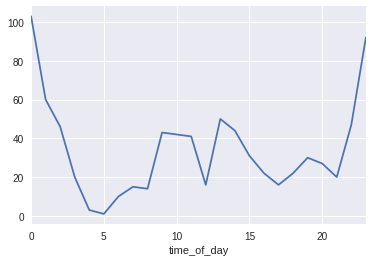

In [117]:
#We plot the count of drugs related stops with respect to hour of day. (24hrs format)
#Similar to mean drugs related stops.

ri.groupby('time_of_day')['drugs_related_stop'].sum().plot()

### Conclusion:
##### Stops go up during the day time and decrease during the night.
##### Drugs related activity goes up during the night and fall during the day.

### Finding bad data in stops_duration column and fixing it.

In [118]:
# Exploring stops_duration

print(ri['stop_duration'].head())

#there are 6 unique values in stops_duration including a nan. 

ri['stop_duration'].unique()

#The 2 and the 1 should be included in the 0-15 Min category if they are minutes.
#But the 1 and 2 could also be hours. 

0     0-15 Min
1     0-15 Min
2     0-15 Min
3    16-30 Min
4     0-15 Min
Name: stop_duration, dtype: object


array(['0-15 Min', '16-30 Min', '30+ Min', nan, '2', '1'], dtype=object)

In [119]:
# Since there are around 5300 missing values and there are only 2 rows with bad data.
# We can include these 2 rows of bad data into missing values. 

import numpy as np

ri.loc[(ri['stop_duration'] == '1') | (ri['stop_duration'] == '2'), 'stop_duration'] = np.nan


In [122]:
# Well, 2 more missing values. 

ri['stop_duration'].value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

### What is the mean stop_duration for each violation_raw?

In [125]:
# What is violation_raw?
# It contains more specific violations instead of the very general in the violation column.

ri['violation_raw'].value_counts()


Speeding                            48463
Other Traffic Violation             16224
Equipment/Inspection Violation      11020
Registration Violation               3432
Seatbelt Violation                   2952
Special Detail/Directed Patrol       2455
Call for Service                     1298
Violation of City/Town Ordinance      211
Motorist Assist/Courtesy              203
APB                                    79
Suspicious Person                      56
Warrant                                15
Name: violation_raw, dtype: int64

In [133]:
# Lets find the mean stop_duration for each violation using groupby.

ri.groupby('violation_raw')['stop_duration'].value_counts(normalize = True)

# Almost all of the violations have mean stop time in range of 0-15 mins. 
# We can further explore it by encoding the stop_time with minutes.

violation_raw                     stop_duration
APB                               0-15 Min         0.468354
                                  16-30 Min        0.303797
                                  30+ Min          0.227848
Call for Service                  0-15 Min         0.421418
                                  16-30 Min        0.335131
                                  30+ Min          0.243451
Equipment/Inspection Violation    0-15 Min         0.832396
                                  16-30 Min        0.124592
                                  30+ Min          0.043013
Motorist Assist/Courtesy          0-15 Min         0.586207
                                  16-30 Min        0.290640
                                  30+ Min          0.123153
Other Traffic Violation           0-15 Min         0.725082
                                  16-30 Min        0.194169
                                  30+ Min          0.080750
Registration Violation            0-15 Min         0

### Compare the age distributions for each violation.

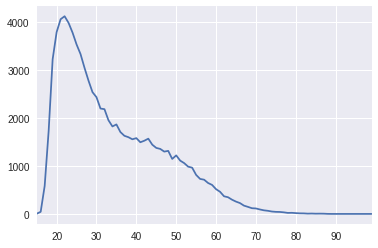

In [137]:
# How Age of drivers stopped is distributed.
# Most of the values lie between ages 20-30.
# Positively Skewed towards larger ages.  

ri['driver_age'].value_counts().sort_index().plot()


In [144]:
# Describing age with aggregates.
# Mean is just a little different from the median.

ri['driver_age'].describe()

count    86120.000000
mean        34.011333
std         12.738564
min         15.000000
25%         23.000000
50%         31.000000
75%         43.000000
max         99.000000
Name: driver_age, dtype: float64

In [143]:
# Lets calculate median age for each violation

ri.groupby('violation')['driver_age'].median()


violation
Equipment              28.0
Moving violation       33.0
Other                  39.0
Registration/plates    30.0
Seat belt              29.0
Speeding               30.0
Name: driver_age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83b2b7b6a0>,
      dtype=object)

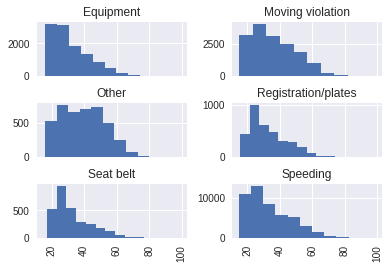

In [147]:
# Lets plot violation with ages.

ri.hist('driver_age', by='violation', sharex=True)

#Most of the distributions are right skewed as a few number of people with large ages were stopped.

# Thank you. :) 
### Thanks also to Kevin Markham - Founder and teacher at DataSchool. 
### You can find kevin @ his youtube channel : https://www.youtube.com/user/dataschool